In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.recfunctions import append_fields

In [2]:
file_1 = "datasets/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv"
file_2 = "datasets/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv"
file_3 = "datasets/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv"
file_4 = "datasets/resale-flat-prices/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv"

In [3]:
# notice that i drop 'remaining_lease' from df_1 and df_2 
df_1 = np.genfromtxt(file_1,
    skip_header=1, dtype=[('month','U50' ),('town','U50' ),
                          ('flat_type','U50' ),('block','U50' ),
                          ('street_name','U50' ),('storey_range','U50' ),
                          ('floor_area_sqm','f8' ),('flat_model','U50' ),
                          ('lease_commence_date','U50'),
                          ('resale_price','f8' )],
                      usecols=(0,1,2,3,4,5,6,7,8,10),
                      delimiter=",",
                      missing_values=['na','-'],filling_values=[0])

In [4]:
df_2 = np.genfromtxt(file_2,
    skip_header=1, dtype=[('month','U50' ),('town','U50' ),
                          ('flat_type','U50' ),('block','U50' ),
                          ('street_name','U50' ),('storey_range','U50' ),
                          ('floor_area_sqm','f8' ),('flat_model','U50' ),
                          ('lease_commence_date','U50'),
                          ('resale_price','f8' )],
                      usecols=(0,1,2,3,4,5,6,7,8,10),
                      delimiter=",",
                      missing_values=['na','-'],filling_values=[0])

In [5]:
df_3 = np.genfromtxt(file_3,
    skip_header=1, dtype=[('month','U50' ),('town','U50' ),
                          ('flat_type','U50' ),('block','U50' ),
                          ('street_name','U50' ),('storey_range','U50' ),
                          ('floor_area_sqm','f8' ),('flat_model','U50' ),
                          ('lease_commence_date','U50'),
                          ('resale_price','f8' )],
                           delimiter=",",
                           missing_values=['na','-'],filling_values=[0])

In [6]:
df_4 = np.genfromtxt(file_4,
    skip_header=1, dtype=[('month','U50' ),('town','U50' ),
                          ('flat_type','U50' ),('block','U50' ),
                          ('street_name','U50' ),('storey_range','U50' ),
                          ('floor_area_sqm','f8' ),('flat_model','U50' ),
                          ('lease_commence_date','U50'),
                          ('resale_price','f8' )],
                           delimiter=",",
                           missing_values=['na','-'],filling_values=[0])

In [7]:
df= np.concatenate ([df_1,df_2,df_3,df_4],axis=0)

In [8]:
print(df_2.shape[0] + df_1.shape[0] + df_3.shape[0] + df_4.shape[0])
print(df.shape)

541808
(541808,)


In [9]:
df[df['month'] == '2000-01'][:5] #create year , create quarter. then join 

array([('2000-01', 'ANG MO KIO', '3 ROOM', '170', 'ANG MO KIO AVE 4', '07 TO 09', 69., 'Improved', '1986', 147000.),
       ('2000-01', 'ANG MO KIO', '3 ROOM', '174', 'ANG MO KIO AVE 4', '04 TO 06', 61., 'Improved', '1986', 144000.),
       ('2000-01', 'ANG MO KIO', '3 ROOM', '216', 'ANG MO KIO AVE 1', '07 TO 09', 73., 'New Generation', '1976', 159000.),
       ('2000-01', 'ANG MO KIO', '3 ROOM', '215', 'ANG MO KIO AVE 1', '07 TO 09', 73., 'New Generation', '1976', 167000.),
       ('2000-01', 'ANG MO KIO', '3 ROOM', '218', 'ANG MO KIO AVE 1', '07 TO 09', 67., 'New Generation', '1976', 163000.)],
      dtype=[('month', '<U50'), ('town', '<U50'), ('flat_type', '<U50'), ('block', '<U50'), ('street_name', '<U50'), ('storey_range', '<U50'), ('floor_area_sqm', '<f8'), ('flat_model', '<U50'), ('lease_commence_date', '<U50'), ('resale_price', '<f8')])

In [10]:
#data adjustments
resale = list(df['resale_price'])
price_000 =[ r/1000 for r in resale]

mth_q = list(df['month'])
year_only = [m[:4] for m in mth_q]
qtr_map = {'01':'Q1','02':'Q1','03':'Q1',
           '04':'Q2','05':'Q2','06':'Q2',
           '07':'Q3','08':'Q3','09':'Q3',
           '10':'Q4','11':'Q4','12':'Q4'}
qtr_only = [qtr_map[m[5:]] for m in mth_q]
mth_qtr_only = [x+"-"+y for x, y  in zip (year_only,qtr_only)] 

df = append_fields(df,'price',price_000, usemask=False,dtypes = "f8") 
df = append_fields(df,'years',year_only, usemask=False,dtypes = "U10") 
df = append_fields(df,'qtr',qtr_only, usemask=False,dtypes = "U10") 
df = append_fields(df,'mth_qtr',mth_qtr_only, usemask=False,dtypes = "U10") 

In [91]:
def plot_boxplots (list_years, rm_type, timescale): 
    
    def by_year_price(by_years,f_type):
        open_list = []
        for year in by_years:
            open_list.append(list(df[(df['flat_type']==f_type)&(df['years']==year)]['price']))
        ans = [np.median(lizt) for lizt in open_list]
        return (open_list, ans)
    
    def by_qtr_price(by_qtr,f_type):
        open_list = []
        for qtr in by_qtr:
            open_list.append(list(df[(df['flat_type']==f_type)&(df['mth_qtr']==qtr)]['price']))
        ans = [np.median(lizt) for lizt in open_list]
        return (open_list,ans)
    
    by_years = list_years
    by_qtr = [i + x for i in list_years for x in ['-Q1','-Q2','-Q3','-Q4'] ] 
    f_type = rm_type
    f_type_lower = f_type.lower()
    
    if timescale == 'by_year':
        labels = by_years
        list_, median_line_ = by_year_price(by_years,f_type)
        timescale_ ='Timeline by Years'
    elif timescale == 'by_qtr':
        labels = by_qtr
        list_, median_line_ = by_qtr_price(by_qtr,f_type)
        timescale_ ='Timeline by Quarters'
    
    plt.style.use('ggplot')
    fig, ax = plt.subplots( figsize=(30,15))
    ax.boxplot(list_,labels=labels)
    
    plt.ylabel('Resale Price in \'000',fontsize=40)
    plt.xlabel(timescale_,fontsize=40)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20,rotation = 45)
    plt.title('Boxplots from {} to {} for {} flat-type'.format(labels[0],labels[-1],f_type_lower),fontsize=40)
    
    pos = np.arange(len(labels)) + 1
    for p,v in zip(range(len(labels)), median_line_) :
        plt.text(pos[p] , v, 'median: \n ${}k'.format(int(v)),fontsize=15, color='black',style='italic',
            horizontalalignment='center', verticalalignment='center')
    
    plt.show(); 

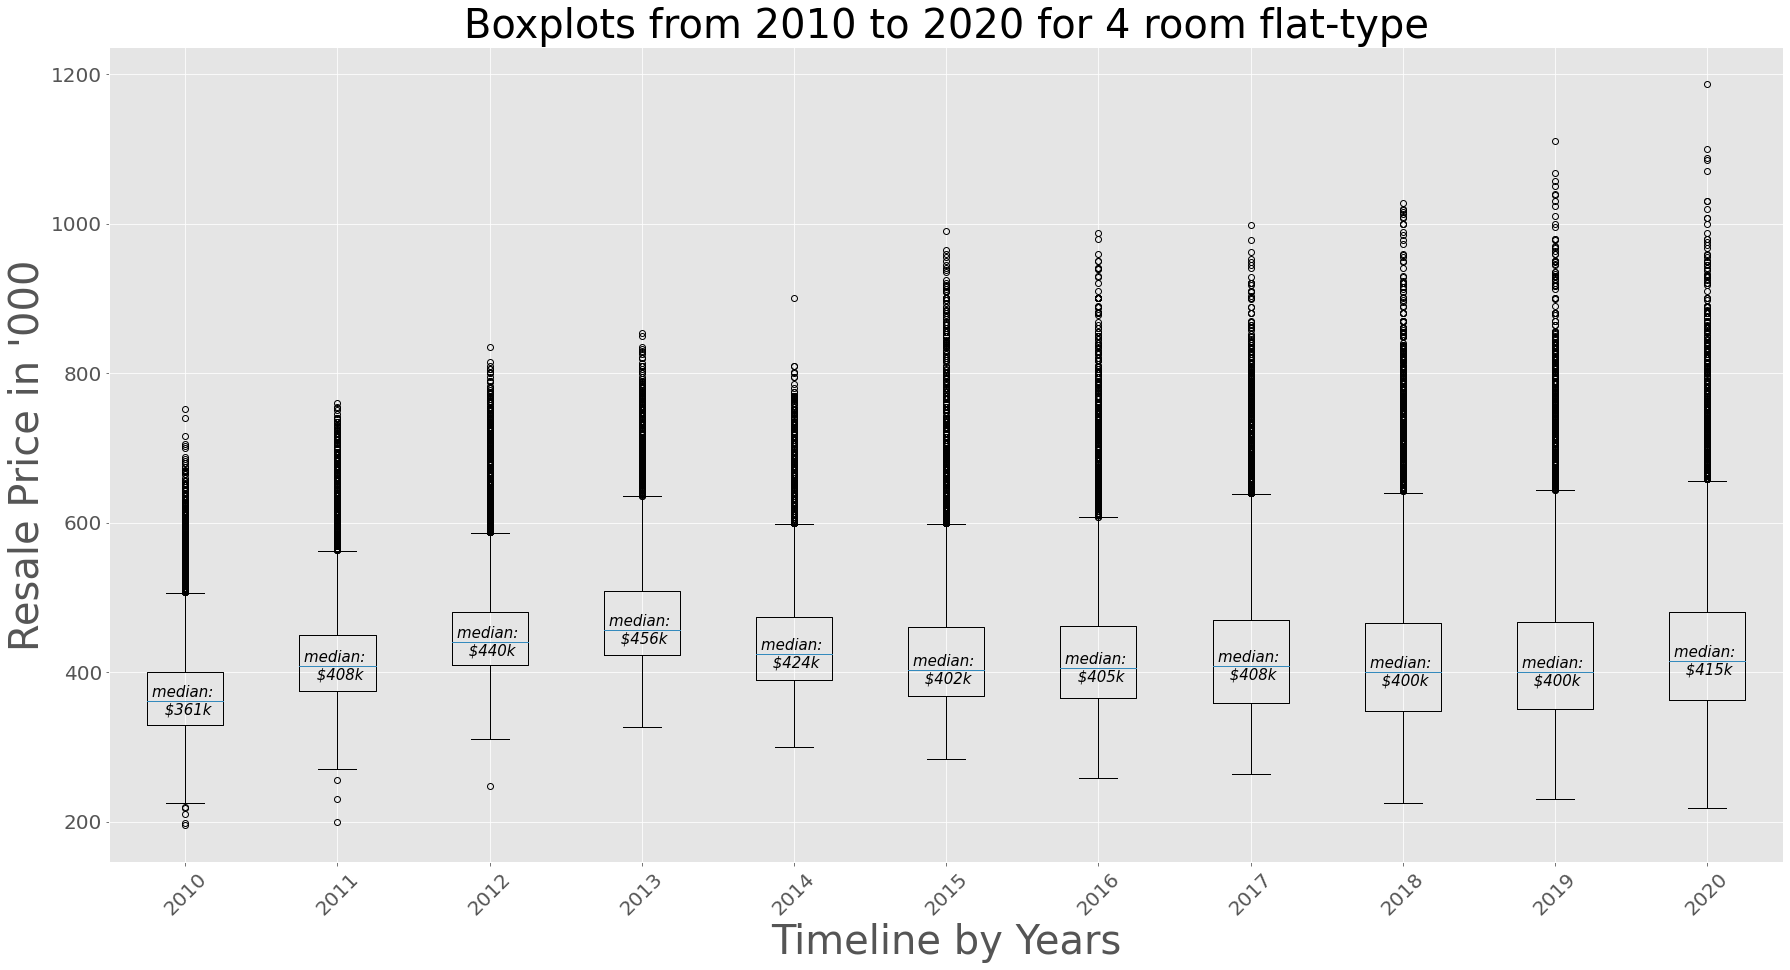

In [96]:
list_years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
rm_type = '4 ROOM'
timescale = 'by_year' #'by_year' #'by_qtr'# 
plot_boxplots (list_years[:], rm_type, timescale)

In [ ]:
plt.text( , upper_line_1 + spacing, 'median{}'.format('hihi'), 
             fontsize=15, color='g',style='italic',
            horizontalalignment='right', verticalalignment='top')

In [ ]:
    xmin, xmax, ymin, ymax = plt.axis()
    space_ = np.linspace(ymin,ymax)
    spacing = (space_[1] - space_[0]) + 2

In [32]:
np.linspace(0.5 , 11.5, 13)

array([ 0.5       ,  1.41666667,  2.33333333,  3.25      ,  4.16666667,
        5.08333333,  6.        ,  6.91666667,  7.83333333,  8.75      ,
        9.66666667, 10.58333333, 11.5       ])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])